# IMPORT LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


 ## Loading dataset from keras library

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
## number of training and testing samples

print(len(X_train),len(X_test))

60000 10000


In [5]:
## sample size in pixle: 28 x 28 pixels
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

> the 0 indicates black where 255 indicates white(hex)

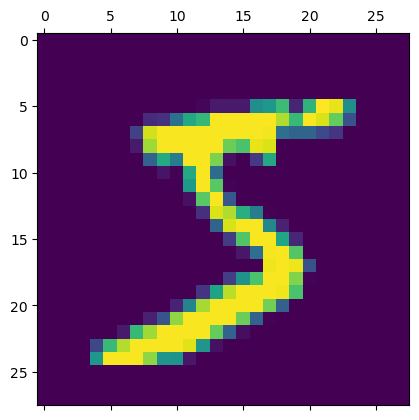

In [8]:
plt.matshow(X_train[0])

In [9]:
# the final number
y_train[0] 

5

In [16]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

> flatten our dataset
> > convert our 28x28 dataset into a 1D array
> > use pandas function reshape

In [23]:
X_train.shape

(60000, 28, 28)

## Scaling the dataset

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [26]:
X_train_flattened [0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Creating a Simple Neural Network

In [27]:
 ##sequential: stack of layer in the NN

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ## Dense: All neuron in one layer are connected with every other neuron in the the other layer
    ])

##optimizer: train effeciently
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

##here we train are model
model.fit(X_train_flattened,y_train, epochs=5)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - accuracy: 0.8132 - loss: 0.7255
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.9149 - loss: 0.3092
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.9212 - loss: 0.2861
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.9225 - loss: 0.2747
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.9248 - loss: 0.2682


In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.9130 - loss: 0.3047


[0.2669297754764557, 0.9236000180244446]

In [32]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step


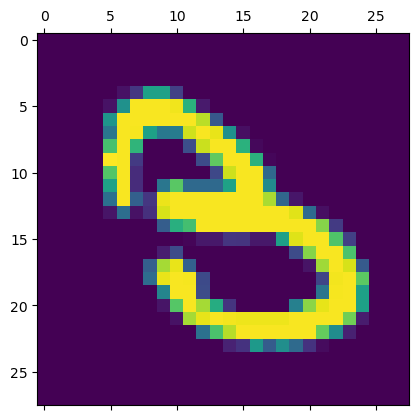

In [30]:
plt.matshow(X_test[18])

In [33]:
y_pred[18]

array([8.1169172e-05, 3.8749949e-06, 9.3897946e-02, 4.4520387e-01,
       1.1992645e-04, 5.5846315e-02, 2.5315311e-02, 1.6618045e-05,
       1.7583324e-02, 5.2248124e-06], dtype=float32)

In [34]:
np.argmax(y_pred[18])

3

In [35]:
y_pred_label=[np.argmax(i) for i in y_pred]

In [36]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
## we do not want to use the array rather the max predicted values

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    7,    6,    3,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    7,  929,   18,    7,    4,   13,   10,   35,    5],
       [   2,    0,   19,  936,    0,   19,    2,   10,   14,    8],
       [   1,    1,    3,    2,  908,    0,   12,    4,    7,   44],
       [   7,    1,    4,   48,   10,  766,   17,    6,   25,    8],
       [  11,    3,    6,    1,    7,   13,  914,    2,    1,    0],
       [   1,    5,   23,   10,    9,    0,    0,  944,    2,   34],
       [   8,    7,    8,   34,   10,   33,    9,   12,  838,   15],
       [  10,    7,    2,   14,   23,    5,    0,   18,    1,  929]],
      dtype=int32)>

## visualize

In [38]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Actual')

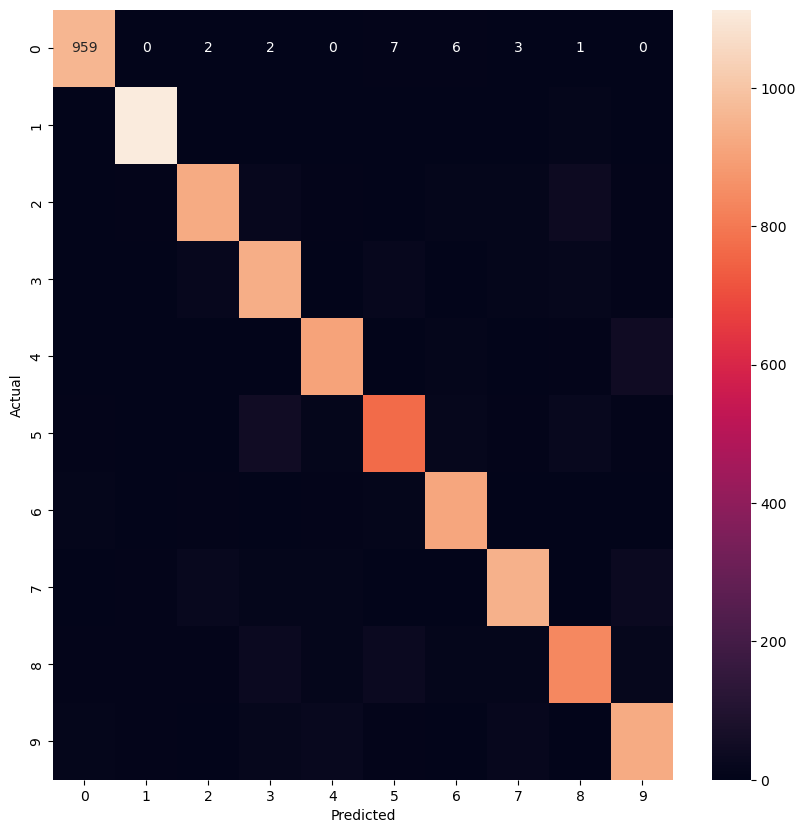

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Adding a Hidden Layer

In [46]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    ## Dense: All neuron in one layer are connected with every other neuron in the the other layer
    keras.layers.Dense(10,activation='sigmoid')
])

##optimizer: train effeciently
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

##here we train are model
model.fit(X_train_flattened,y_train, epochs=5)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.8716 - loss: 0.4475
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.9613 - loss: 0.1330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.9745 - loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.9809 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9844 - loss: 0.0525


In [47]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.9703 - loss: 0.0912


[0.07846023887395859, 0.9742000102996826]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


Text(95.72222222222221, 0.5, 'Actual')

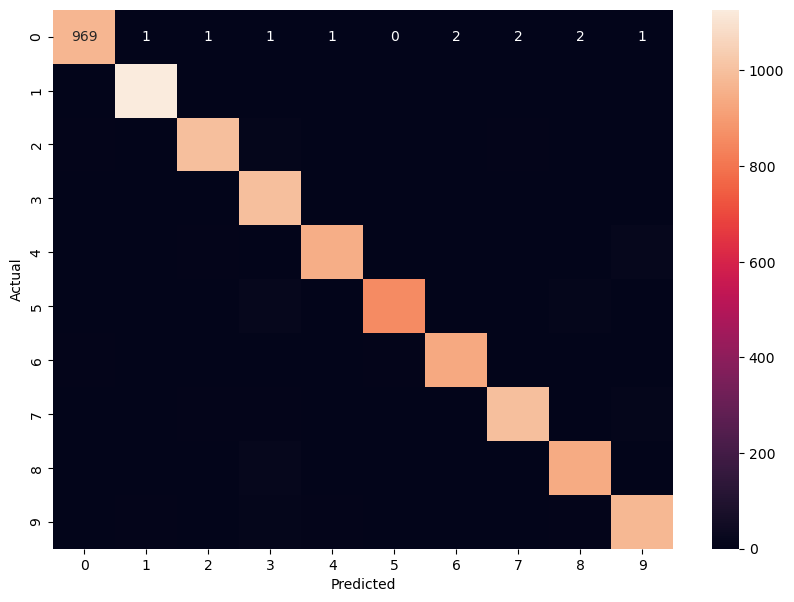

In [49]:
y_pred = model.predict(X_test_flattened)

y_pred_label=[np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

*Flattening Array using Keras*

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    ## Dense: All neuron in one layer are connected with every other neuron in the the other layer
    keras.layers.Dense(10,activation='sigmoid')
])

##optimizer: train effeciently
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

##here we train are model
model.fit(X_train,y_train, epochs=5)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.8767 - loss: 0.4527
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.9615 - loss: 0.1319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.9742 - loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - accuracy: 0.9806 - loss: 0.0649
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.9854 - loss: 0.0489


In [52]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9719 - loss: 0.0891


[0.07650121301412582, 0.9754999876022339]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


Text(95.72222222222221, 0.5, 'Actual')

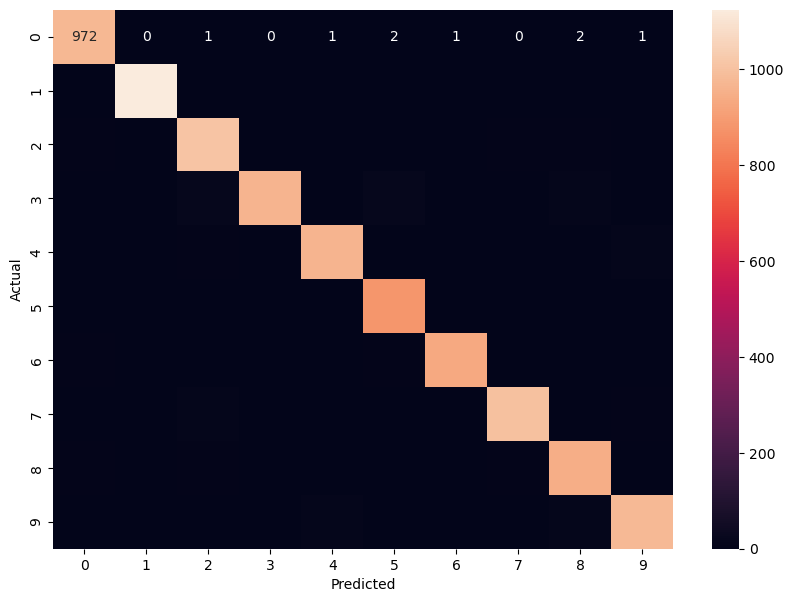

In [53]:
y_pred = model.predict(X_test)

y_pred_label=[np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")